In [36]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt

In [4]:
raw = pd.read_csv("../airdata_raw.csv")

In [15]:
data = pd.read_csv("../1h_sampled_data.csv")
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.iloc[:138,:]

In [16]:
data

,time,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi,temp_blue,precip,hum_blue,wind_speed,...,hum_sbs,wind,pressure,PM2.5,PM10,AQI,sunrise,noon,sunset,daylight
0,2021-03-23 10:00:00+01:00,8.316667,53.283333,6.042500,11.798333,17.710000,3.106314,0.0,76.0,5.116561,...,65.0,3.7,1025.0,16.0,24.3,59.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
1,2021-03-23 11:00:00+01:00,13.408333,38.358333,4.840833,10.010000,15.388333,5.416314,0.0,67.0,6.924738,...,65.0,3.7,1025.0,14.0,20.9,55.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
2,2021-03-23 12:00:00+01:00,17.391667,32.191667,5.140833,7.510833,9.632500,7.216313,0.0,55.0,7.421590,...,57.0,14.8,1025.0,12.0,17.3,50.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
3,2021-03-23 14:00:00+01:00,19.983333,28.125000,4.610000,10.042500,15.750000,9.586313,0.0,39.0,11.269782,...,40.0,11.1,1025.0,11.0,16.2,45.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
4,2021-03-23 15:00:00+01:00,17.625000,30.933333,4.365000,9.652500,15.223333,10.446314,0.0,37.0,9.826088,...,40.0,11.1,1025.0,10.0,15.0,41.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2021-04-02 19:00:00+02:00,19.033333,45.283333,9.275833,14.583333,19.600833,15.226314,0.0,59.0,15.978484,...,48.0,14.8,1015.0,26.0,36.1,80.0,2021-04-02 07:02:49.545605+02:00,2021-04-02 13:29:27+02:00,2021-04-02 19:56:42.325780+02:00,0 days 12:53:52.780175
134,2021-04-02 21:00:00+02:00,17.125000,45.558333,6.501667,13.345000,20.454167,12.586313,0.0,52.0,20.929594,...,51.0,18.5,1016.0,18.0,26.2,63.0,2021-04-02 07:02:49.545605+02:00,2021-04-02 13:29:27+02:00,2021-04-02 19:56:42.325780+02:00,0 days 12:53:52.780175
135,2021-04-02 23:00:00+02:00,14.100000,43.183333,4.860833,8.177500,11.425833,9.466313,0.0,64.0,20.188908,...,47.0,20.4,1018.0,13.0,19.1,53.0,2021-04-02 07:02:49.545605+02:00,2021-04-02 13:29:27+02:00,2021-04-02 19:56:42.325780+02:00,0 days 12:53:52.780175
136,2021-04-03 03:00:00+02:00,10.166667,53.141667,5.784167,11.315833,17.000000,6.216313,0.0,77.0,8.121970,...,61.0,7.4,1019.0,9.0,14.4,37.0,2021-04-03 07:00:50.408490+02:00,2021-04-03 13:29:09+02:00,2021-04-03 19:58:06.555666+02:00,0 days 12:57:16.147176


In [39]:
labels = ['PM2.5_pi', 'PM10_pi']
drop = ['time', 'sunrise', 'sunset', 'noon','daylight', 'date', 'PM2.5', 'PM10']

In [40]:
features = data.drop(labels + drop, axis=1).columns

In [41]:
pm2 = []
for f in features:
    corr = pearsonr(data[f], data[labels[0]])
    pm2.append(corr[0])
    print("Correlation " + f, corr[0])

Correlation temp_pi 0.2139100058133688
Correlation hum_pi -0.07907220732820856
Correlation PM1_pi 0.9544757103068259
Correlation temp_blue 0.20730467140826214
Correlation precip -0.2371475486338562
Correlation hum_blue -0.10613712528731598
Correlation wind_speed -0.21523869420393724
Correlation wind_direction -0.2928108954949312
Correlation cloud_cover -0.051107219755319705
Correlation temp_sbs 0.20893649668285857
Correlation hum_sbs -0.09469802163714688
Correlation wind -0.24995065005679215
Correlation pressure -0.47159246101317254
Correlation AQI 0.5840469210484827


In [42]:
pm10 = []
for f in features:
    corr = pearsonr(data[f], data[labels[1]])
    pm10.append(corr[0])
    print("Correlation " + f, corr[0])

Correlation temp_pi 0.19815121486552686
Correlation hum_pi -0.07600384805220071
Correlation PM1_pi 0.8825003834959603
Correlation temp_blue 0.18964056671494392
Correlation precip -0.23036587370135733
Correlation hum_blue -0.10926762134824933
Correlation wind_speed -0.21721498598931596
Correlation wind_direction -0.29321198649542984
Correlation cloud_cover -0.08821281455008995
Correlation temp_sbs 0.18327402528168033
Correlation hum_sbs -0.08087286079683872
Correlation wind -0.25803976310394333
Correlation pressure -0.4324954462706876
Correlation AQI 0.5478378157033967


In [43]:
def plot_corr(corr, features):
    
    cc = ['colors']*len(corr)
    
    for i, coef in enumerate(corr):
        if coef > 0:
            cc[i] = 'green'
        else:
            cc[i] = 'red'
            
    plt.bar(features, corr, color=cc)
    plt.xticks(rotation=90)
    plt.show()

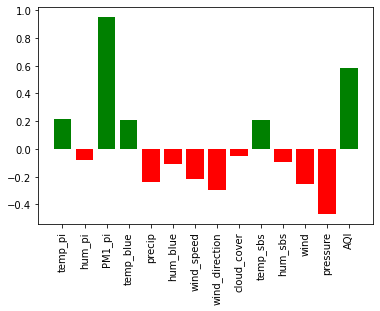

In [44]:
plot_corr(pm2, features)

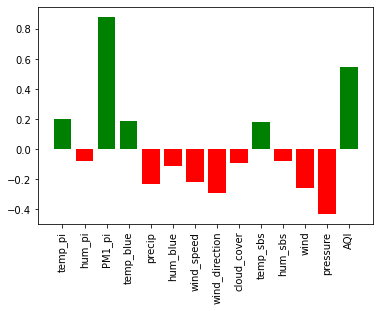

In [45]:
plot_corr(pm10, features)